# Predicting average age of the squad in English Premier League
It is simple code and doesn't provide any new information. But in this notebook, I try show dependence of average age in the league by attributes "Points" and "GD". 
First of all, we try just import useful libraries to make decision:

In [155]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import math

After we try to watch our data. And in this data we can see results of the table each year from 2008 to 2018.

In [193]:
epl = pd.read_csv("PositionsvsValue.csv")
epl = epl.loc[epl['Season'] != 2018]
epl

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8
...,...,...,...,...,...,...,...,...,...,...,...
195,EPL,2017,West Bromwich Albion,33,25.5,17,165.50,5.02,-25,31,20
196,EPL,2017,AFC Bournemouth,35,25.0,13,116.10,3.32,-16,44,12
197,EPL,2017,Brighton & Hove Albion,39,25.8,26,106.75,2.74,-20,40,15
198,EPL,2017,Burnley FC,30,26.8,16,96.85,3.23,-3,54,7


# Representing data in the graphic
Also, we can see below graphic that represent dependence of average age and points.

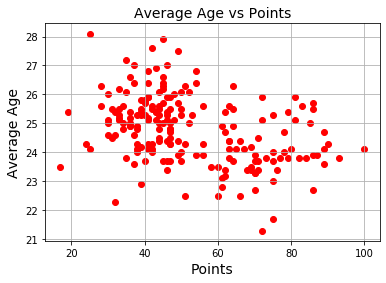

In [194]:
plt.scatter(epl['Points'], epl['Average Age'], color='red')
plt.title('Average Age vs Points', fontsize=14)
plt.xlabel('Points', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.grid(True)
plt.show()

Dependence of the average age and goal difference

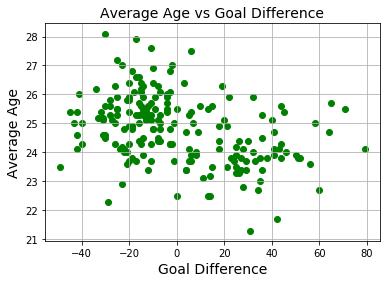

In [195]:
plt.scatter(epl['GD'], epl['Average Age'], color='green')
plt.title('Average Age vs Goal Difference', fontsize=14)
plt.xlabel('Goal Difference', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.grid(True)
plt.show()

## Model of the Linear Regression
After we try to make model of the Linear Regression that predict average age of the team by goal difference and points

In [196]:
X = epl[['Points', 'GD']]
Y = epl['Average Age']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 26.449874218800787
Coefficients: 
 [-0.03170022  0.00419265]
                            OLS Regression Results                            
Dep. Variable:            Average Age   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     16.74
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.93e-07
Time:                        02:11:39   Log-Likelihood:                -296.31
No. Observations:                 200   AIC:                             598.6
Df Residuals:                     197   BIC:                             608.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

## Take a example of the data
As example we take table of the EPL in 2018 to check our prediction

In [197]:
epl2018 = data.loc[data['Season'] == 2018]
epl2018.sort_values(by="Position")

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position
200,EPL,2018,Manchester City,46,23.3,33,1000.10,22.92,72,98,1
202,EPL,2018,Liverpool FC,39,23.8,25,900.10,23.08,67,97,2
201,EPL,2018,Chelsea FC,54,24.6,40,1000.10,19.38,24,72,3
204,EPL,2018,Tottenham Hotspur,34,24.5,20,819.60,24.11,28,71,4
205,EPL,2018,Arsenal FC,42,23.9,28,593.30,14.13,22,70,5
203,EPL,2018,Manchester United,36,24.4,22,833.00,23.14,11,66,6
217,EPL,2018,Wolverhampton Wanderers,40,23.1,26,160.43,4.01,1,57,7
206,EPL,2018,Everton FC,40,25.0,25,429.50,10.74,8,54,8
207,EPL,2018,Leicester City,38,25.4,27,329.00,8.66,3,52,9
208,EPL,2018,West Ham United,37,25.7,22,309.70,8.37,-3,52,10


## Representing our prediction in the data frame
After we just put our prediction and difference from real value to data frame to see how much our prediction is accurate

In [198]:
results = []
for index,team in epl2018.iterrows():
    our_predict = regr.predict([[team['Points'], team['GD']]])
    real_value = team['Average Age']
    difference = abs(our_predict-real_value)
    
    results.append((team['Team'], round(our_predict[0],2),
                   real_value,
                   round(difference[0],3)))

In [199]:
result_frame = pd.DataFrame(results, columns = ['Team','Prediction','Real Value', 'Difference'])
result_frame

,Team,Prediction,Real Value,Difference
0,Manchester City,23.65,23.3,0.345
1,Chelsea FC,24.27,24.6,0.332
2,Liverpool FC,23.66,23.8,0.144
3,Manchester United,24.40,24.4,0.004
4,Tottenham Hotspur,24.32,24.5,0.183
5,Arsenal FC,24.32,23.9,0.423
6,Everton FC,24.77,25.0,0.228
7,Leicester City,24.81,25.4,0.586
8,West Ham United,24.79,25.7,0.911
9,Southampton FC,25.13,23.9,1.230


# Calculate the accuracy
After we can calculate appromixate accuracy for our prediction model

In [204]:
sum_errors = 0
teams = epl2018['Team'].count()

for index, team in result_frame.iterrows():
    error = team['Difference']/team['Real Value'] * 100
    sum_errors+=error

accuracy = 100 - sum_errors/teams
print(str(round(accuracy,2))+"%")

97.45%
